In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.8
nruns = 10
ouput_name = 'XGBRegressor_liver_rate08'  


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data',
                  sep = ",", header = None)
print(data.head())
data.colums = str(data.columns)
X,y = data.iloc[:, [x for x in range(data.shape[1]) if x != 6]].astype(np.float32),data.iloc[:,-1]
G = len(np.unique(y))
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y = le2.fit_transform(y)
for g in range(G):
  print(sum(y==g))

X.shape

C:\Users\foxku\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term
    0   1   2   3   4    5  6
0  85  92  45  27  31  0.0  1
1  85  64  59  32  23  0.0  2
2  86  54  33  16  54  0.0  2
3  91  78  34  24  36  0.0  2
4  87  70  12  28  10  0.0  2
145
200


(345, 6)

In [2]:
def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    encoder = LabelEncoder()
    encoder.fit(y_train)
    y_train = pd.DataFrame(encoder.transform(y_train))
    y_test = pd.DataFrame(encoder.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

# Generate missing data, impute, and use SHAP to explain

In [3]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model, get_spearrman = False))

C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 0
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.96it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.30it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.94it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.54it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.27it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.01it/s]


Validation result: best alpha 0.1, best score 0.9174617841242892, scores {0.0: 0.934978433129233, 0.01: 0.9298170529630085, 0.1: 0.9174617841242892, 1.0: 0.9289881898740115, 10.0: 0.9735113325398217, 100.0: 0.9860077032215429}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 133.77it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.24it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 32.87it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.19it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 48.11it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.93it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.27it/s]


Validation result: best alpha 0.1, best score 0.9174617841242892, scores {0.0: 0.9349784331292331, 0.01: 0.9298170529630085, 0.1: 0.9174617841242892, 1.0: 0.9289881898740115, 10.0: 0.9735113325398219, 100.0: 0.9860077032215429}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 145.20it/s]


loss 0.4828183
loss 0.4894362
loss 0.5692965
loss 0.55244654
loss 0.5202998
loss 0.47243637
loss 0.43571028
loss 0.4074136
loss 0.3388313
loss 0.2864068
number of runs used by missForest: 10
loss: 0.2864068
loss 0.51893264
loss 0.5933632
loss 0.5087354
loss 0.53282094
loss 0.43452466
loss 0.38433763
loss 0.4275695
loss 0.49399832
loss 0.53818166
loss 0.49207187
number of runs used by missForest: 10
loss: 0.49207187


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 194.49it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 1
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 62.30it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64.45it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.49it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.60it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.55it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.63it/s]


Validation result: best alpha 1.0, best score 0.8516150875270095, scores {0.0: 0.9052164126101978, 0.01: 0.8968891157283099, 0.1: 0.8633483737767694, 1.0: 0.8516150875270095, 10.0: 0.878684731481144, 100.0: 0.8866086297371704}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 102.78it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.05it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.15it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.87it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 48.11it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.95it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.64it/s]


Validation result: best alpha 1.0, best score 0.8516150875270095, scores {0.0: 0.9052164126101978, 0.01: 0.8968891157283099, 0.1: 0.8633483737767694, 1.0: 0.8516150875270095, 10.0: 0.878684731481144, 100.0: 0.8866086297371703}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 405.25it/s]


loss 0.5196529
loss 0.7752831
loss 0.6421249
loss 0.8690479
loss 0.6871665
loss 0.8353841
loss 0.6000127
loss 0.5789822
loss 0.39940244
loss 0.44349107
number of runs used by missForest: 10
loss: 0.44349107
loss 0.47826913
loss 0.64136803
loss 0.5202885
loss 0.539916
loss 0.56200635
loss 0.7570006
loss 0.5733912
loss 0.6244308
loss 0.62749004
loss 0.7551942
number of runs used by missForest: 10
loss: 0.7551942


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 248.15it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 2
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.92it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.14it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.32it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.88it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.24it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.35it/s]


Validation result: best alpha 0.1, best score 0.8935411623005689, scores {0.0: 0.8951519772801758, 0.01: 0.8948525134416625, 0.1: 0.8935411623005689, 1.0: 0.9061205210013903, 10.0: 0.9406335926606466, 100.0: 0.9498291752710204}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 107.90it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 82.12it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.81it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.40it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.40it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.68it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 78.72it/s]


Validation result: best alpha 0.1, best score 0.8935411623005689, scores {0.0: 0.8951519772801758, 0.01: 0.8948525134416625, 0.1: 0.8935411623005689, 1.0: 0.9061205210013903, 10.0: 0.9406335926606466, 100.0: 0.9498291752710204}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 428.57it/s]


loss 0.4762297
loss 0.5864669
loss 0.49934125
loss 0.5928635
loss 0.8254451
loss 0.94444376
loss 0.9091092
loss 0.86285037
loss 0.7502569
loss 0.9091161
number of runs used by missForest: 10
loss: 0.9091161
loss 0.48004925
loss 0.63189656
loss 0.6558803
loss 0.91471475
loss 0.72202384
loss 0.90148175
loss 0.71091926
loss 1.1177769
loss 0.7529847
loss 0.9667873
number of runs used by missForest: 10
loss: 0.9667873


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 353.27it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 3
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.93it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.83it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.45it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 60.79it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.10it/s]


Validation result: best alpha 0.1, best score 0.947813646772118, scores {0.0: 0.9827099539023955, 0.01: 0.9744923099352912, 0.1: 0.947813646772118, 1.0: 0.9610455741320904, 10.0: 1.0332044888014915, 100.0: 1.0521124628124103}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 129.56it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.68it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.07it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 58.99it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.55it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 73.44it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 69.82it/s]


Validation result: best alpha 0.1, best score 0.947813646772118, scores {0.0: 0.9827099539023955, 0.01: 0.9744923099352912, 0.1: 0.947813646772118, 1.0: 0.9610455741320904, 10.0: 1.0332044888014915, 100.0: 1.0521124628124103}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 141.12it/s]


loss 0.5540303
loss 0.71403867
loss 0.39734486
loss 0.42709997
loss 0.3812742
loss 0.37940893
loss 0.33618543
loss 0.3794881
loss 0.3383845
loss 0.34831944
number of runs used by missForest: 10
loss: 0.34831944
loss 0.5274433
loss 0.6608446
loss 0.40204015
loss 0.35887346
loss 0.24303338
loss 0.22005692
loss 0.28254595
loss 0.19513677
loss 0.23192938
loss 0.21064955
number of runs used by missForest: 10
loss: 0.21064955


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 221.64it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 4
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.21it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.02it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.44it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.47it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.42it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.73it/s]


Validation result: best alpha 0.1, best score 0.8397132791323457, scores {0.0: 0.8461301633287379, 0.01: 0.8448954989194253, 0.1: 0.8397132791323457, 1.0: 0.8668794934616227, 10.0: 0.9495875923950251, 100.0: 0.971883580140827}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 88.97it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31.42it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.33it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.81it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 82.99it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 68.25it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.36it/s]


Validation result: best alpha 0.1, best score 0.8397132791323457, scores {0.0: 0.8461301633287379, 0.01: 0.8448954989194253, 0.1: 0.8397132791323457, 1.0: 0.8668794934616227, 10.0: 0.9495875923950251, 100.0: 0.9718835801408271}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 173.00it/s]


loss 0.40061477
loss 0.43707448
loss 0.36729565
loss 0.45735532
loss 0.40039897
loss 0.4894352
loss 0.4227715
loss 0.39699194
loss 0.312516
loss 0.2873849
number of runs used by missForest: 10
loss: 0.2873849
loss 0.44506088
loss 0.51125365
loss 0.60304135
loss 0.6476188
loss 0.53496826
loss 0.6192569
loss 0.69179106
loss 0.6884803
loss 0.7307488
loss 0.70267344
number of runs used by missForest: 10
loss: 0.70267344


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 186.93it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 5
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.15it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 68.61it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 65.55it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 58.23it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 73.38it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 125.49it/s]


Validation result: best alpha 1.0, best score 0.8421017138754473, scores {0.0: 0.8929466765383622, 0.01: 0.8890530462405948, 0.1: 0.878890711959036, 1.0: 0.8421017138754473, 10.0: 0.888243742974954, 100.0: 0.9008988139445739}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.55it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.05it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.56it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 66.98it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.72it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.95it/s]


Validation result: best alpha 1.0, best score 0.8421017138754473, scores {0.0: 0.8929466765383622, 0.01: 0.8890530462405948, 0.1: 0.878890711959036, 1.0: 0.8421017138754473, 10.0: 0.888243742974954, 100.0: 0.900898813944574}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 269.90it/s]


loss 0.505601
loss 0.78030264
loss 0.51118946
loss 0.46263537
loss 0.5899172
loss 0.47624955
loss 0.4557366
loss 0.41613638
loss 0.40072334
loss 0.3797283
number of runs used by missForest: 10
loss: 0.3797283
loss 0.5203521
loss 0.7125735
loss 0.507221
loss 0.6294502
loss 0.48070553
loss 0.46543124
loss 0.59541345
loss 0.7604413
loss 0.6994786
loss 0.67590463
number of runs used by missForest: 10
loss: 0.67590463


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 211.82it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.62it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.59it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 72.11it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.06it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.32it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 61.80it/s]


Validation result: best alpha 1.0, best score 1.105053687815342, scores {0.0: 1.160393428511916, 0.01: 1.149856030457318, 0.1: 1.1230514335472122, 1.0: 1.105053687815342, 10.0: 1.2106407261238372, 100.0: 1.2398340824496688}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 109.10it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.36it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 62.79it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 64.55it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.96it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.33it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.88it/s]


Validation result: best alpha 1.0, best score 1.105053687815342, scores {0.0: 1.160393428511916, 0.01: 1.149856030457318, 0.1: 1.1230514335472122, 1.0: 1.105053687815342, 10.0: 1.2106407261238372, 100.0: 1.2398340824496685}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 133.82it/s]


loss 0.5411953
loss 0.8730118
loss 0.6079616
loss 0.7695921
loss 0.47365385
loss 0.43008828
loss 0.4686759
loss 0.36296338
loss 0.31554103
loss 0.24718215
number of runs used by missForest: 10
loss: 0.24718215
loss 0.5332136
loss 0.8083861
loss 0.43836445
loss 0.51204765
loss 0.4872702
loss 0.49107563
loss 0.38857755
loss 0.4430295
loss 0.31819656
loss 0.33482555
number of runs used by missForest: 10
loss: 0.33482555


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 229.83it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 7
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.21it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.33it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.38it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.74it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 60.52it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 66.54it/s]


Validation result: best alpha 1.0, best score 1.0730120664088043, scores {0.0: 1.0884303892710223, 0.01: 1.085052986334514, 0.1: 1.0733992679010138, 1.0: 1.0730120664088043, 10.0: 1.1095223207891292, 100.0: 1.1211601026738878}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 147.84it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.44it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.15it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 48.86it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.01it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.96it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.60it/s]


Validation result: best alpha 1.0, best score 1.0730120664088043, scores {0.0: 1.0884303892710223, 0.01: 1.085052986334514, 0.1: 1.0733992679010138, 1.0: 1.0730120664088043, 10.0: 1.1095223207891292, 100.0: 1.121160102673888}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 123.69it/s]


loss 0.46007705
loss 0.77069443
loss 0.8483874
loss 0.7164779
loss 0.6956168
loss 0.87871397
loss 0.62451506
loss 0.7000709
loss 0.5214132
loss 0.58255655
number of runs used by missForest: 10
loss: 0.58255655
loss 0.44470203
loss 0.86167485
loss 0.8970097
loss 0.9415215
loss 0.55385816
loss 0.5904775
loss 0.641379
loss 0.7320527
loss 0.5849202
loss 0.51042855
number of runs used by missForest: 10
loss: 0.51042855


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 195.18it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 75.86it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.23it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.11it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.46it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.71it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.61it/s]


Validation result: best alpha 1.0, best score 0.9606880620909308, scores {0.0: 10.640448605328494, 0.01: 1.6704899385360776, 0.1: 0.9849443140635538, 1.0: 0.9606880620909308, 10.0: 1.0008872842620717, 100.0: 1.0119335955208693}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 116.29it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.16it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.54it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.47it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.76it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.20it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55.04it/s]


Validation result: best alpha 1.0, best score 0.9606880620909308, scores {0.0: 10.640448605328496, 0.01: 1.6704899385360776, 0.1: 0.9849443140635538, 1.0: 0.9606880620909308, 10.0: 1.0008872842620717, 100.0: 1.0119335955208693}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 244.23it/s]


loss 0.5738832
loss 0.57957864
loss 0.39831606
loss 0.45018312
loss 0.42927
loss 0.3029976
loss 0.34579796
loss 0.26933855
loss 0.31549585
loss 0.34746101
number of runs used by missForest: 10
loss: 0.34746101
loss 0.61867326
loss 0.6591801
loss 0.51771444
loss 0.54433554
loss 0.49447963
loss 0.37532082
loss 0.30929932
loss 0.31131712
loss 0.28909782
loss 0.21855965
number of runs used by missForest: 10
loss: 0.21855965


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 190.20it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 9
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 72.07it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 67.42it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 61.35it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 63.09it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 83.47it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.81it/s]


Validation result: best alpha 0.1, best score 0.8467596777967304, scores {0.0: 0.863060648524163, 0.01: 0.8588015866444181, 0.1: 0.8467596777967304, 1.0: 0.8554381993646597, 10.0: 0.8971533309441724, 100.0: 0.9098437250466689}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 163.60it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.26it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.00it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.04it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.40it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.54it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 76.72it/s]


Validation result: best alpha 0.1, best score 0.8467596777967303, scores {0.0: 0.863060648524163, 0.01: 0.8588015866444181, 0.1: 0.8467596777967303, 1.0: 0.8554381993646596, 10.0: 0.8971533309441724, 100.0: 0.9098437250466689}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 334.41it/s]


loss 0.48684555
loss 0.6894729
loss 0.6092178
loss 0.56258154
loss 0.6335024
loss 0.6331494
loss 0.59555006
loss 0.5914265
loss 0.56228536
loss 0.6239648
number of runs used by missForest: 10
loss: 0.6239648
loss 0.5114936
loss 0.8555286
loss 0.60983944
loss 0.6715763
loss 0.5887663
loss 0.552026
loss 0.5546125
loss 0.45232436
loss 0.5957929
loss 0.5978219
number of runs used by missForest: 10
loss: 0.5978219


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 161.05it/s]


In [4]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [5]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.812 1.169 1.438 0.997 0.77  2.055]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[3.4   1.133 1.403 1.381 1.451 1.411 1.312]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.407 0.409 0.442 0.425 0.443 0.441 0.459]


In [7]:
mse_imputation_all

array([0.8122068 , 1.16868659, 1.43844144, 0.99710658, 0.76958647,
       2.0550734 ])

In [8]:
mse_shap_all

array([3.39956285, 1.13298262, 1.40295058, 1.3813947 , 1.45073136,
       1.41096659, 1.31218422])

In [9]:
dfplot = pd.DataFrame({'MSE on X test':np.hstack(([0], mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE on X test,MSE Shap
Xgb on missing data,0.000000,3.399563
Mean Imputation,0.812207,1.132983
MICE,1.168687,1.402951
DIMV,1.438441,1.381395
missForest,0.997107,1.450731
SOFT-IMPUTE,0.769586,1.410967
GAIN,2.055073,1.312184


In [10]:
dfplot.T.round(3)

,Xgb on missing data,Mean Imputation,MICE,DIMV,missForest,SOFT-IMPUTE,GAIN
MSE on X test,0.0,0.812,1.169,1.438,0.997,0.770,2.055
MSE Shap,3.4,1.133,1.403,1.381,1.451,1.411,1.312


In [11]:
dfplot.T.round(3).to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\\\\n\\midrule\nMSE on X test & 0.000000 & 0.812000 & 1.169000 & 1.438000 & 0.997000 & 0.770000 & 2.055000 \\\\\nMSE Shap & 3.400000 & 1.133000 & 1.403000 & 1.381000 & 1.451000 & 1.411000 & 1.312000 \\\\\n\\bottomrule\n\\end{tabular}\n'

imputation MSE versus Shapley MSE


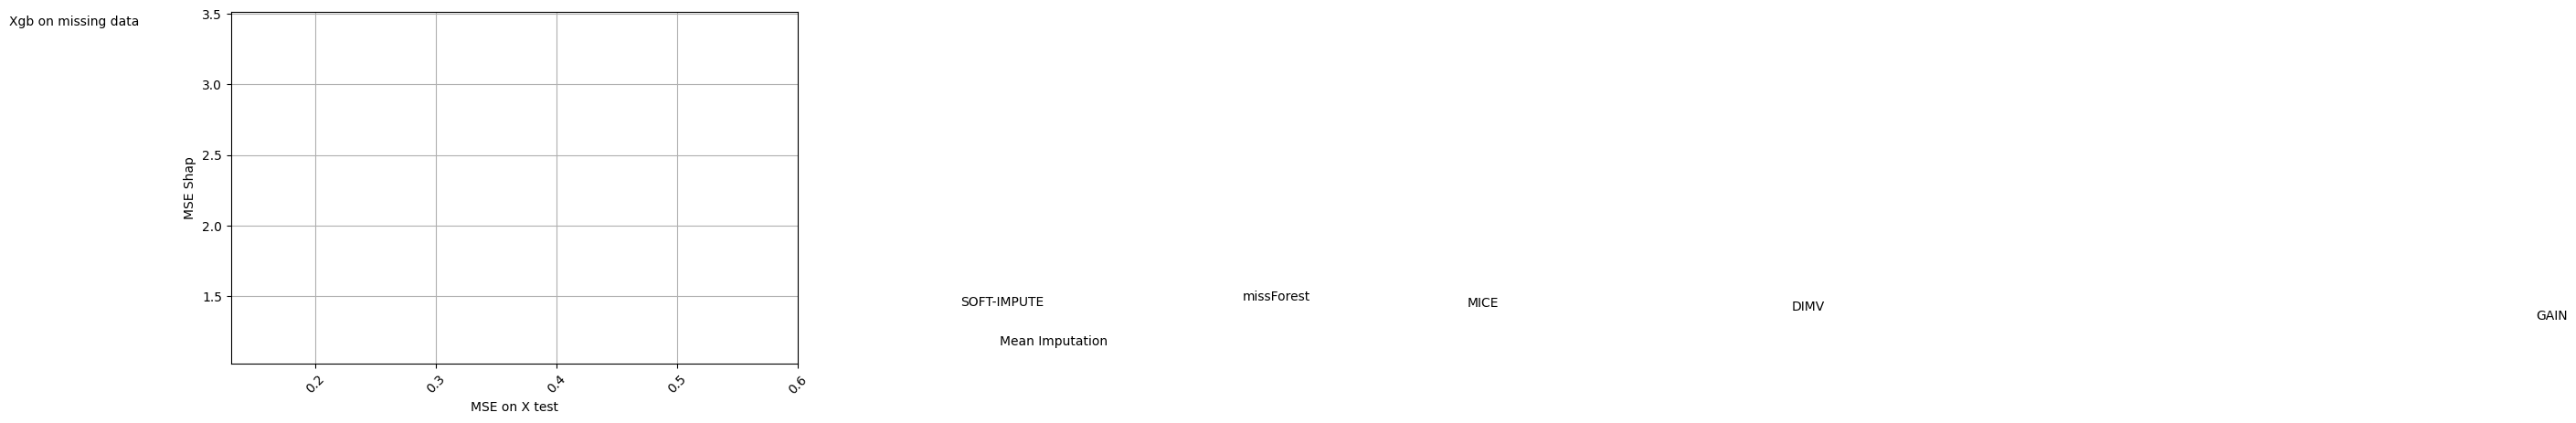

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on X test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on X test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on X test')
plt.xlim(0.130, 0.6)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

beeswarm plot for class 1


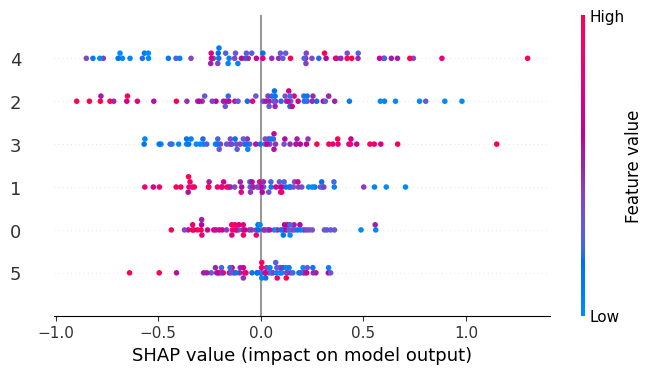

In [13]:
import matplotlib.pyplot as plt
import shap

plt.figure()
plt.rcParams.update({'font.size': 20})  # Adjust font size globally
print('beeswarm plot for class 1')
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/' + ouput_name + 'beeswarm' + 'ori' + '.png', bbox_inches='tight')
plt.show()